Testing different models, no improvement, val loss ~0.7

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')
mean = float_data[:2501].mean(axis=0)
std = float_data[:2501].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
lookback = 15
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3] ##### HIT KURDE 1 to numer kolumny ktora przewiduje wtf
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2501,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3001 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

Najlepszy model z CPI i Interest Rate

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(5,
  activation='sigmoid',))
model.add(layers.Dense(1))
model.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=400,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
400/400 [==============================] - 32s 69ms/step - loss: 0.4781 - val_loss: 0.7055
Epoch 2/40
400/400 [==============================] - 28s 69ms/step - loss: 0.2536 - val_loss: 0.3642
Epoch 3/40
400/400 [==============================] - 27s 68ms/step - loss: 0.1677 - val_loss: 0.1644
Epoch 4/40
400/400 [==============================] - 28s 70ms/step - loss: 0.1276 - val_loss: 0.0973
Epoch 5/40
400/400 [==============================] - 27s 68ms/step - loss: 0.1034 - val_loss: 0.0972
Epoch 6/40
400/400 [==============================] - 28s 71ms/step - loss: 0.0879 - val_loss: 0.1047
Epoch 7/40
400/400 [==============================] - 27s 69ms/step - loss: 0.0820 - val_loss: 0.1050
Epoch 8/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0765 - val_loss: 0.1610
Epoch 9/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0725 - val_loss: 0.1040
Epoch 10/40
400/400 [==============================] - 27s 69ms/step - loss: 0.069

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)
eval *std[3]

526/526 [==============================] - 9s 18ms/step - loss: 0.1348


0.050349507229384916

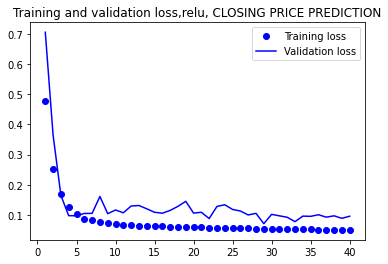

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model without CPI and Interest Rate

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.Dense(5,
  activation='sigmoid',))
model1.add(layers.Dense(1))
model1.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history1 = model1.fit(train_gen,
  steps_per_epoch=400,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
400/400 [==============================] - 46s 103ms/step - loss: 0.2008 - val_loss: 0.0608
Epoch 2/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0929 - val_loss: 0.0751
Epoch 3/40
400/400 [==============================] - 28s 70ms/step - loss: 0.0813 - val_loss: 0.0501
Epoch 4/40
400/400 [==============================] - 28s 70ms/step - loss: 0.0766 - val_loss: 0.0546
Epoch 5/40
400/400 [==============================] - 27s 67ms/step - loss: 0.0745 - val_loss: 0.0610
Epoch 6/40
400/400 [==============================] - 28s 70ms/step - loss: 0.0725 - val_loss: 0.0548
Epoch 7/40
400/400 [==============================] - 28s 69ms/step - loss: 0.0709 - val_loss: 0.0496
Epoch 8/40
400/400 [==============================] - 27s 67ms/step - loss: 0.0701 - val_loss: 0.0474
Epoch 9/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0687 - val_loss: 0.0460
Epoch 10/40
400/400 [==============================] - 27s 67ms/step - loss: 0.06

In [ ]:
eval1 = model1.evaluate(test_gen, steps = test_steps)
eval1 *std[3]

526/526 [==============================] - 6s 12ms/step - loss: 0.0787


0.02937452634231308

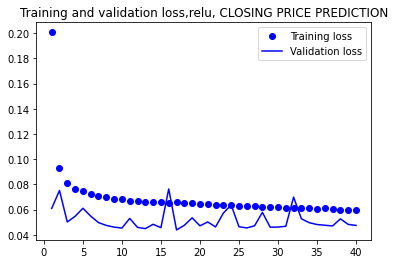

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Model with lower number of neurons. After 40 epochs, loss was improving, until 200 epochs it wasn't changing much, about 0.8.

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.LSTM(4,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.GRU(3,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.LSTM(4,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(3,
  activation='sigmoid',))
model2.add(layers.Dense(1))
model2.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 24s 43ms/step - loss: 0.8479 - val_loss: 0.9186
Epoch 2/200
400/400 [==============================] - 17s 43ms/step - loss: 0.4007 - val_loss: 0.1753
Epoch 3/200
400/400 [==============================] - 17s 42ms/step - loss: 0.2445 - val_loss: 0.1074
Epoch 4/200
400/400 [==============================] - 19s 47ms/step - loss: 0.2077 - val_loss: 0.1049
Epoch 5/200
400/400 [==============================] - 17s 41ms/step - loss: 0.1899 - val_loss: 0.1248
Epoch 6/200
400/400 [==============================] - 17s 42ms/step - loss: 0.1765 - val_loss: 0.1455
Epoch 7/200
400/400 [==============================] - 17s 42ms/step - loss: 0.1659 - val_loss: 0.1129
Epoch 8/200
400/400 [==============================] - 17s 42ms/step - loss: 0.1602 - val_loss: 0.1461
Epoch 9/200
400/400 [==============================] - 17s 42ms/step - loss: 0.1543 - val_loss: 0.1450
Epoch 10/200
400/400 [==============================] - 17s 41ms/step - l

In [ ]:
eval2 = model2.evaluate(test_gen, steps = test_steps)
eval2 *std[3]

526/526 [==============================] - 6s 11ms/step - loss: 0.0836


0.031212396532884545

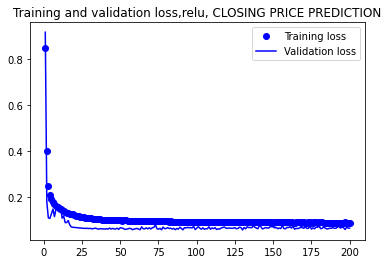

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Model with higher number of neurons.

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(layers.LSTM(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.GRU(64,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.LSTM(32,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.Dense(8,
  activation='sigmoid',))
model3.add(layers.Dense(1))
model3.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history3 = model3.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 43s 86ms/step - loss: 0.3419 - val_loss: 0.0911
Epoch 2/200
400/400 [==============================] - 32s 80ms/step - loss: 0.1106 - val_loss: 0.0859
Epoch 3/200
400/400 [==============================] - 33s 83ms/step - loss: 0.0962 - val_loss: 0.0590
Epoch 4/200
400/400 [==============================] - 32s 81ms/step - loss: 0.0914 - val_loss: 0.0581
Epoch 5/200
400/400 [==============================] - 33s 82ms/step - loss: 0.0887 - val_loss: 0.0552
Epoch 6/200
400/400 [==============================] - 33s 83ms/step - loss: 0.0857 - val_loss: 0.0558
Epoch 7/200
400/400 [==============================] - 32s 81ms/step - loss: 0.0847 - val_loss: 0.0719
Epoch 8/200
400/400 [==============================] - 32s 80ms/step - loss: 0.0831 - val_loss: 0.0539
Epoch 9/200
400/400 [==============================] - 32s 80ms/step - loss: 0.0816 - val_loss: 0.0635
Epoch 10/200
400/400 [==============================] - 32s 81ms/step - l

In [ ]:
eval3 = model3.evaluate(test_gen, steps = test_steps)
eval3 *std[3]

526/526 [==============================] - 7s 13ms/step - loss: 0.1099


0.041026368360092436

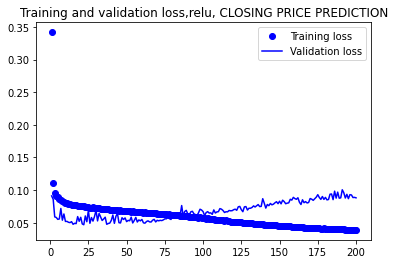

In [ ]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss3) + 1)
plt.figure()
plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Different architecture

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(layers.GRU(11,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.Dense(11,
  activation='sigmoid',))
model4.add(layers.Dense(1))
model4.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history4 = model4.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 41s 85ms/step - loss: 0.2531 - val_loss: 0.1026
Epoch 2/200
400/400 [==============================] - 33s 83ms/step - loss: 0.1195 - val_loss: 0.1091
Epoch 3/200
400/400 [==============================] - 34s 85ms/step - loss: 0.1092 - val_loss: 0.1055
Epoch 4/200
400/400 [==============================] - 33s 83ms/step - loss: 0.1060 - val_loss: 0.0816
Epoch 5/200
400/400 [==============================] - 33s 84ms/step - loss: 0.1024 - val_loss: 0.0752
Epoch 6/200
400/400 [==============================] - 33s 83ms/step - loss: 0.0982 - val_loss: 0.0589
Epoch 7/200
400/400 [==============================] - 33s 83ms/step - loss: 0.0951 - val_loss: 0.0597
Epoch 8/200
400/400 [==============================] - 33s 83ms/step - loss: 0.0931 - val_loss: 0.0614
Epoch 9/200
400/400 [==============================] - 33s 83ms/step - loss: 0.0908 - val_loss: 0.0602
Epoch 10/200
400/400 [==============================] - 34s 84ms/step - l

In [ ]:
eval4 = model4.evaluate(test_gen, steps = test_steps)
eval4 *std[3]

526/526 [==============================] - 11s 21ms/step - loss: 0.0952


0.03555072538139781

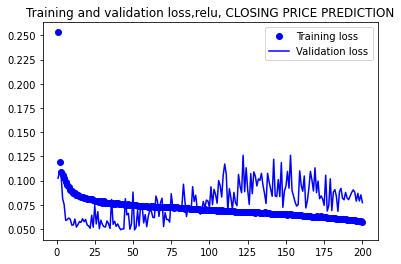

In [ ]:
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs4 = range(1, len(loss4) + 1)
plt.figure()
plt.plot(epochs4, loss4, 'bo', label='Training loss')
plt.plot(epochs4, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model5 = tf.keras.models.Sequential()
model5.add(layers.LSTM(256,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.Dense(1))
model5.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history5 = model5.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 83s 203ms/step - loss: 0.1113 - val_loss: 0.0670
Epoch 2/200
400/400 [==============================] - 81s 203ms/step - loss: 0.0774 - val_loss: 0.0529
Epoch 3/200
400/400 [==============================] - 79s 199ms/step - loss: 0.0749 - val_loss: 0.0640
Epoch 4/200
400/400 [==============================] - 80s 199ms/step - loss: 0.0733 - val_loss: 0.0471
Epoch 5/200
400/400 [==============================] - 80s 199ms/step - loss: 0.0728 - val_loss: 0.0465
Epoch 6/200
400/400 [==============================] - 80s 199ms/step - loss: 0.0724 - val_loss: 0.0460
Epoch 7/200
400/400 [==============================] - 80s 199ms/step - loss: 0.0709 - val_loss: 0.0458
Epoch 8/200
400/400 [==============================] - 80s 199ms/step - loss: 0.0720 - val_loss: 0.0531
Epoch 9/200
400/400 [==============================] - 80s 199ms/step - loss: 0.0701 - val_loss: 0.0448
Epoch 10/200
400/400 [==============================] - 80s 200m

In [ ]:
eval5 = model5.evaluate(test_gen, steps = test_steps)
eval5 *std[3]

526/526 [==============================] - 40s 76ms/step - loss: 0.1098


0.040992134098684074

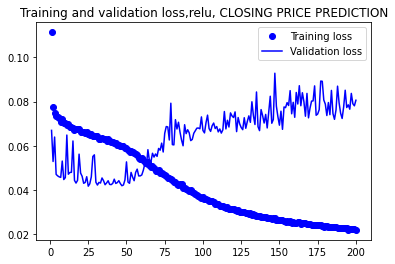

In [ ]:
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs5 = range(1, len(loss5) + 1)
plt.figure()
plt.plot(epochs5, loss5, 'bo', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Delay set to  0 (WRONG!)

In [ ]:
model6 = tf.keras.models.Sequential()
model6.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.Dense(5,
  activation='sigmoid',))
model6.add(layers.Dense(1))
model6.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history6 = model6.fit(train_gen,
  steps_per_epoch=400,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
400/400 [==============================] - 30s 69ms/step - loss: 0.2471 - val_loss: 0.0971
Epoch 2/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0920 - val_loss: 0.0648
Epoch 3/40
400/400 [==============================] - 29s 72ms/step - loss: 0.0721 - val_loss: 0.0407
Epoch 4/40
400/400 [==============================] - 28s 69ms/step - loss: 0.0638 - val_loss: 0.0371
Epoch 5/40
400/400 [==============================] - 28s 70ms/step - loss: 0.0587 - val_loss: 0.0414
Epoch 6/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0554 - val_loss: 0.0630
Epoch 7/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0523 - val_loss: 0.0324
Epoch 8/40
400/400 [==============================] - 27s 67ms/step - loss: 0.0510 - val_loss: 0.0336
Epoch 9/40
400/400 [==============================] - 27s 67ms/step - loss: 0.0488 - val_loss: 0.0339
Epoch 10/40
400/400 [==============================] - 27s 68ms/step - loss: 0.048

In [ ]:
eval6 = model6.evaluate(test_gen, steps = test_steps)
eval6 *std[3]

526/526 [==============================] - 6s 11ms/step - loss: 0.0603


0.022511627967694015

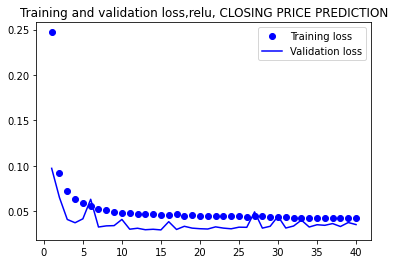

In [ ]:
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
epochs6 = range(1, len(loss6) + 1)
plt.figure()
plt.plot(epochs6, loss6, 'bo', label='Training loss')
plt.plot(epochs6, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model with dropout 0.2.

In [ ]:
model7 = tf.keras.models.Sequential()
model7.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model7.add(layers.Dense(5,
  activation='sigmoid',))
model7.add(layers.Dense(1))
model7.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history7 = model7.fit(train_gen,
  steps_per_epoch=400,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
400/400 [==============================] - 30s 70ms/step - loss: 0.1869 - val_loss: 0.0756
Epoch 2/40
400/400 [==============================] - 27s 69ms/step - loss: 0.0976 - val_loss: 0.1130
Epoch 3/40
400/400 [==============================] - 29s 73ms/step - loss: 0.0870 - val_loss: 0.0522
Epoch 4/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0821 - val_loss: 0.0603
Epoch 5/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0781 - val_loss: 0.0968
Epoch 6/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0761 - val_loss: 0.0510
Epoch 7/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0744 - val_loss: 0.0514
Epoch 8/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0736 - val_loss: 0.0619
Epoch 9/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0729 - val_loss: 0.0567
Epoch 10/40
400/400 [==============================] - 27s 68ms/step - loss: 0.073

In [ ]:
eval7 = model7.evaluate(test_gen, steps = test_steps)
eval7 *std[3]

526/526 [==============================] - 6s 12ms/step - loss: 0.0784


0.029256050092933972

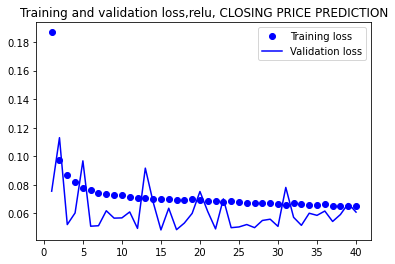

In [ ]:
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']
epochs7 = range(1, len(loss7) + 1)
plt.figure()
plt.plot(epochs7, loss7, 'bo', label='Training loss')
plt.plot(epochs7, val_loss7, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model8 = tf.keras.models.Sequential()
model8.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.3,
  recurrent_dropout=0.3,
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.Dense(5,
  activation='sigmoid',))
model8.add(layers.Dense(1))
model8.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history8 = model8.fit(train_gen,
  steps_per_epoch=400,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
400/400 [==============================] - 30s 68ms/step - loss: 0.1988 - val_loss: 0.0687
Epoch 2/40
400/400 [==============================] - 27s 68ms/step - loss: 0.1051 - val_loss: 0.0553
Epoch 3/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0924 - val_loss: 0.0708
Epoch 4/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0861 - val_loss: 0.0574
Epoch 5/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0840 - val_loss: 0.0554
Epoch 6/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0812 - val_loss: 0.0587
Epoch 7/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0805 - val_loss: 0.0632
Epoch 8/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0796 - val_loss: 0.0568
Epoch 9/40
400/400 [==============================] - 27s 68ms/step - loss: 0.0776 - val_loss: 0.0552
Epoch 10/40
400/400 [==============================] - 27s 67ms/step - loss: 0.077

In [ ]:
eval8 = model8.evaluate(test_gen, steps = test_steps)
eval8 *std[3]

526/526 [==============================] - 6s 12ms/step - loss: 0.0818


0.030545579552809787

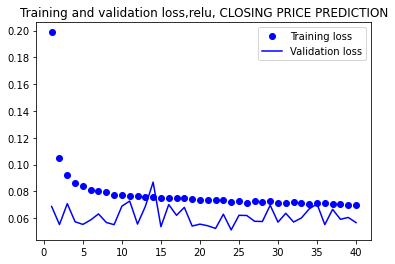

In [ ]:
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']
epochs8 = range(1, len(loss8) + 1)
plt.figure()
plt.plot(epochs8, loss8, 'bo', label='Training loss')
plt.plot(epochs8, val_loss8, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model9 = tf.keras.models.Sequential()
model9.add(layers.LSTM(128,
  activation='sigmoid',
  #dropout=0.3,
  #recurrent_dropout=0.3,
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.Dense(5,
  activation='sigmoid',))
model9.add(layers.Dense(1))
model9.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history9 = model9.fit(train_gen,
  steps_per_epoch=400,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
400/400 [==============================] - 24s 56ms/step - loss: 0.4495 - val_loss: 0.6759
Epoch 2/40
400/400 [==============================] - 22s 56ms/step - loss: 0.2394 - val_loss: 0.3386
Epoch 3/40
400/400 [==============================] - 22s 56ms/step - loss: 0.1566 - val_loss: 0.1421
Epoch 4/40
400/400 [==============================] - 22s 56ms/step - loss: 0.1166 - val_loss: 0.0819
Epoch 5/40
400/400 [==============================] - 22s 55ms/step - loss: 0.0927 - val_loss: 0.0711
Epoch 6/40
400/400 [==============================] - 22s 55ms/step - loss: 0.0798 - val_loss: 0.0502
Epoch 7/40
400/400 [==============================] - 22s 55ms/step - loss: 0.0726 - val_loss: 0.0486
Epoch 8/40
400/400 [==============================] - 22s 56ms/step - loss: 0.0687 - val_loss: 0.0430
Epoch 9/40
400/400 [==============================] - 22s 56ms/step - loss: 0.0655 - val_loss: 0.0466
Epoch 10/40
400/400 [==============================] - 22s 56ms/step - loss: 0.064

In [ ]:
eval9 = model9.evaluate(test_gen, steps = test_steps)
eval9 *std[3]

526/526 [==============================] - 13s 24ms/step - loss: 0.0769


0.028703953775296887

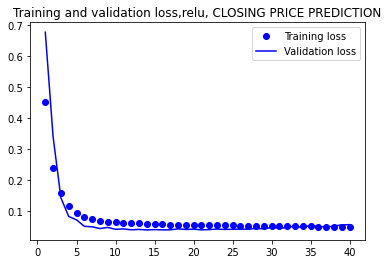

In [ ]:
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']
epochs9 = range(1, len(loss9) + 1)
plt.figure()
plt.plot(epochs9, loss9, 'bo', label='Training loss')
plt.plot(epochs9, val_loss9, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Last layer with 11 neurons

In [ ]:
model10 = tf.keras.models.Sequential()
model10.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model10.add(layers.Dense(11,
  activation='sigmoid',))
model10.add(layers.Dense(1))
model10.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history10 = model10.fit(train_gen,
  steps_per_epoch=400,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
400/400 [==============================] - 30s 69ms/step - loss: 0.2359 - val_loss: 0.0886
Epoch 2/40
400/400 [==============================] - 28s 69ms/step - loss: 0.0928 - val_loss: 0.0517
Epoch 3/40
400/400 [==============================] - 30s 74ms/step - loss: 0.0820 - val_loss: 0.0577
Epoch 4/40
400/400 [==============================] - 29s 73ms/step - loss: 0.0774 - val_loss: 0.0507
Epoch 5/40
400/400 [==============================] - 28s 69ms/step - loss: 0.0739 - val_loss: 0.0491
Epoch 6/40
400/400 [==============================] - 28s 69ms/step - loss: 0.0716 - val_loss: 0.0468
Epoch 7/40
400/400 [==============================] - 28s 70ms/step - loss: 0.0704 - val_loss: 0.0494
Epoch 8/40
400/400 [==============================] - 28s 70ms/step - loss: 0.0686 - val_loss: 0.0463
Epoch 9/40
400/400 [==============================] - 28s 69ms/step - loss: 0.0682 - val_loss: 0.0501
Epoch 10/40
400/400 [==============================] - 28s 69ms/step - loss: 0.067

In [ ]:
eval10 = model10.evaluate(test_gen, steps = test_steps)
eval10 *std[3]

526/526 [==============================] - 11s 21ms/step - loss: 0.0801


0.029896694804901314

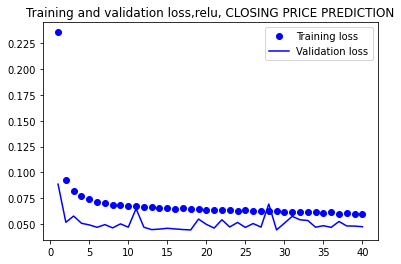

In [ ]:
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']
epochs10 = range(1, len(loss10) + 1)
plt.figure()
plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model11 = tf.keras.models.Sequential()
model11.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.GRU(16,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.Dense(1))
model11.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history11 = model11.fit(train_gen,
  steps_per_epoch=400,
  epochs=100,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/100
400/400 [==============================] - 43s 97ms/step - loss: 0.1537 - val_loss: 0.0808
Epoch 2/100
400/400 [==============================] - 38s 96ms/step - loss: 0.0866 - val_loss: 0.0567
Epoch 3/100
400/400 [==============================] - 39s 98ms/step - loss: 0.0810 - val_loss: 0.0606
Epoch 4/100
400/400 [==============================] - 39s 97ms/step - loss: 0.0790 - val_loss: 0.0666
Epoch 5/100
400/400 [==============================] - 39s 96ms/step - loss: 0.0780 - val_loss: 0.0761
Epoch 6/100
400/400 [==============================] - 38s 95ms/step - loss: 0.0765 - val_loss: 0.0530
Epoch 7/100
400/400 [==============================] - 38s 95ms/step - loss: 0.0754 - val_loss: 0.0543
Epoch 8/100
400/400 [==============================] - 38s 96ms/step - loss: 0.0739 - val_loss: 0.0499
Epoch 9/100
400/400 [==============================] - 38s 96ms/step - loss: 0.0740 - val_loss: 0.0538
Epoch 10/100
400/400 [==============================] - 38s 95ms/step - l

In [ ]:
eval11 = model11.evaluate(test_gen, steps = test_steps)
eval11 *std[3]

526/526 [==============================] - 15s 28ms/step - loss: 0.0940


0.03508708287293838

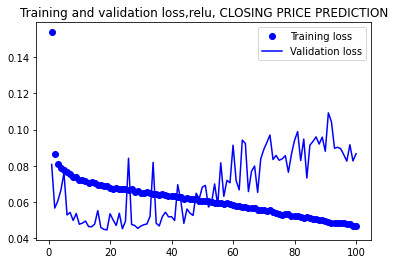

In [ ]:
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']
epochs11 = range(1, len(loss11) + 1)
plt.figure()
plt.plot(epochs11, loss11, 'bo', label='Training loss')
plt.plot(epochs11, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()